In [2]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
df = pd.read_csv('alturas-pesos-1-train.csv') #Leo el csv
tamano_muestra = len(df)

In [6]:
df.head(5)

,Genero,Peso,Altura
0,Mujer,61,162
1,Hombre,97,181
2,Hombre,73,172
3,Mujer,55,157
4,Mujer,56,151


In [12]:
from collections import Counter
lista_tuplas = []
for line in df[['Peso', 'Altura']].values: #Construyo una lista de tuplas que contiene solo los pesos y las alturas
    lista_tuplas.append(tuple(line))

#Genera un diccionario cuya key es la tupla de p y h, y valor nro. ocurrencias
dicc_frecuencia_conjunta = dict(Counter(lista_tuplas)) 
#Genera un diccionario cuya key es la misma que en dicc_frecuencia_conjunta y valor = frecuencia usando len(df)
dicc_probabilidad_conjunta = {clave:valor/tamano_muestra for clave, valor in dicc_frecuencia_conjunta.items()}

#print(lista_tuplas)
#print(dicc_frecuencia_conjunta)
#print(dicc_probabilidad_conjunta)

(91, 62)


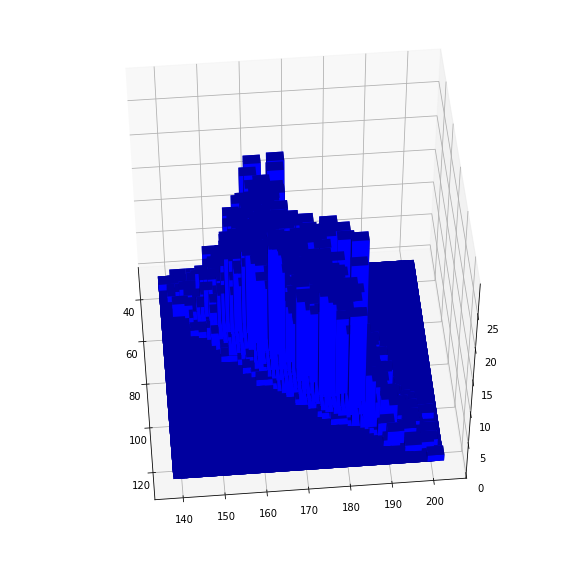

In [16]:
from helper import plot_joint_3d #Otra función de helper.py
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#La línea siguiente da como resultado un numpy array. En el proceso de obtenerlo, se grafica la conjunta en 3-D
np_array_conjunta = plot_joint_3d(dicc_frecuencia_conjunta, bins_width = 4, az=50, el=-5, ax=ax)


In [ ]:
print(np_array_conjunta.shape)

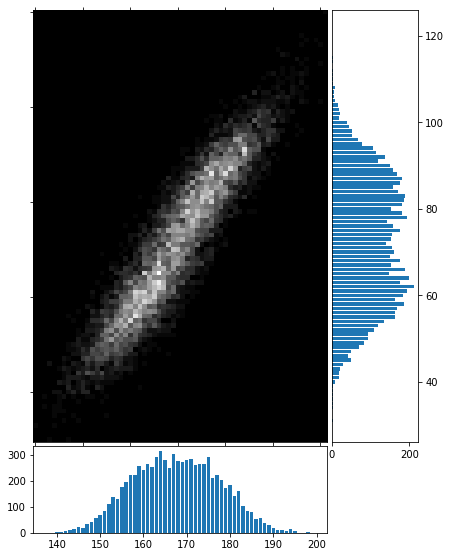

In [17]:
from helper import plot_joint_hists_dicts

#Acá grafico la conjunta y las marginales. Está todo junto porque no separé hombres de mujeres
np_array_conjunta, p_min, a_min = plot_joint_hists_dicts(dicc_frecuencia_conjunta)

# Armamos Conjunta Condicional por genero

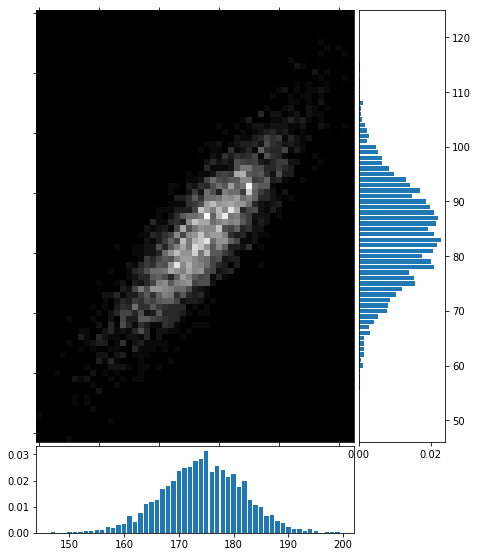

In [19]:
lista_tuplas_hombres = []
#Lo que sigue arma la lista de tuplas como antes, pero ahora filtra hombres
for line in df[df['Genero']=='Hombre'][['Peso', 'Altura']].values:
    lista_tuplas_hombres.append(tuple(line))

dicc_frecuencia_conjunta_hombres = dict(Counter(lista_tuplas_hombres))
dicc_probabilidad_conjunta_hombres = {clave:valor/tamano_muestra for clave, valor in dicc_frecuencia_conjunta_hombres.items()}
np_array_conjunta, p_min, a_min = plot_joint_hists_dicts(dicc_probabilidad_conjunta_hombres)

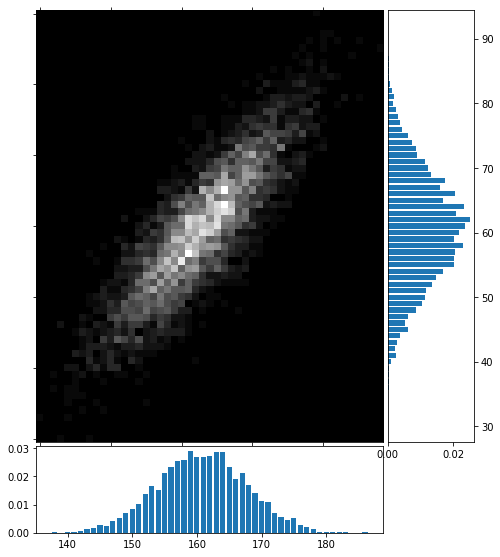

In [7]:
lista_tuplas_mujeres = []
for line in df[df['Genero']=='Mujer'][['Peso', 'Altura']].values:
    lista_tuplas_mujeres.append(tuple(line))
dicc_frecuencia_conjunta_mujeres = dict(Counter(tuplas))
dicc_probabilidad_conjunta_mujeres = {clave:valor/tamano_muestra for clave, valor in dicc_frecuencia_conjunta_mujeres.items()}
_ = plot_joint_hists_dicts(dicc_probabilidad_conjunta_mujeres) #Y esto? Eran tres variables antes

# Modelamos con Gaussiana bivariable

Con pandas

In [20]:
#Calculamos matriz de covarianza con Pandas para los hombres
df[df['Genero']=='Hombre'][['Peso', 'Altura']].cov()

,Peso,Altura
Peso,80.787596,56.299412
Altura,56.299412,53.174570


In [21]:
#Lo mismo con las mujeres
df[df['Genero']=='Mujer'][['Peso', 'Altura']].cov()

,Peso,Altura
Peso,75.271662,50.747354
Altura,50.747354,47.723564


In [22]:
import numpy as np

Que tenemos que calcular?

In [33]:
#Armamos dos numpy arrays que contengan solo los pesos y alturas, uno por genero
np_array_pesos_alturas_hombres = df[df['Genero']=='Hombre'][['Peso', 'Altura']].values
np_array_pesos_alturas_mujeres = df[df['Genero']=='Mujer'][['Peso', 'Altura']].values

In [34]:
#Armamos numpy arrays con las medias. Axis = 0 significa filas e implica que cada fila es una observación, cada columna 
#una variable. El resultado es un numpy array
np_array_medias_hombres = np_array_pesos_alturas_hombres.mean(axis=0)
np_array_medias_mujeres = np_array_pesos_alturas_mujeres.mean(axis=0)
print("Numpy Arrays de Medias para hombres y mujeres resp.")
print(np_array_medias_hombres, np_array_medias_mujeres)

#Lo mismo vale para las varianzas
np_array_varianzas_hombres = np_array_pesos_alturas_hombres.var(axis=0)
np_array_varianzas_mujeres = np_array_pesos_alturas_mujeres.var(axis=0)
print("Numpy Arrays de Varianzas para hombres y mujeres resp.")
print(np_array_varianzas_hombres, np_array_varianzas_mujeres)

#print(type(np_array_medias_hombres))

Numpy Arrays de Medias para hombres y mujeres resp.
[ 83.95577211 174.4177911 ] [ 60.63481741 160.80765383]
Numpy Arrays de Varianzas para hombres y mujeres resp.
[80.76740921 53.16128268] [75.25283477 47.71162726]


In [35]:
#Lo que sigue se puede calcular bien con Numpy o con Pandas, si tuviéramos dataframes. 
#Dado que tenemos numpy arrays, usamos numpy. Por default, numpy calcula las covarianzas suponiendo que 
#cada fila es una variable, cada columna, una observación, por eso la tengo que trasponer

np_array_covarianzas_hombres = np.cov(np_array_pesos_alturas_hombres.T)
np_array_covarianzas_mujeres = np.cov(np_array_pesos_alturas_mujeres.T)
print(np_array_covarianzas_hombres)
print(np_array_covarianzas_mujeres)

[[80.78759602 56.2994124 ]
 [56.2994124  53.17456968]]
[[75.2716621  50.74735416]
 [50.74735416 47.72356412]]


In [36]:
#Otra vez importamos desde helper
from helper import plot_mv_gaussian

In [38]:
#La línea de abajo me permite usar widgets en los charts para poder interactuar con ellos, 
#por ej. sliders que varían parámetros de una curva y me dejan ver como va cambiando

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
%matplotlib widget

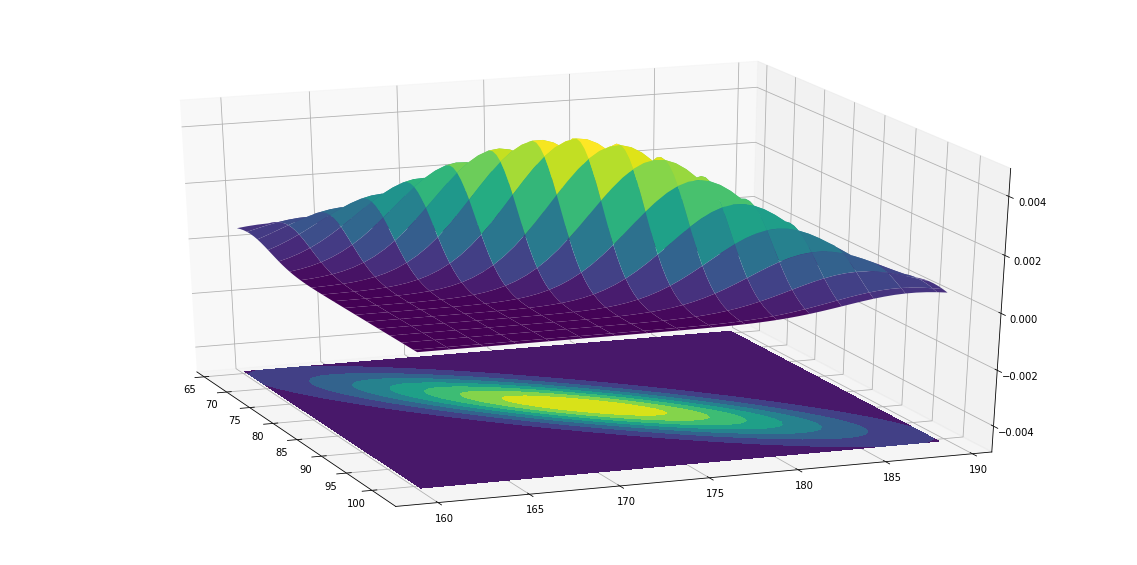

In [42]:
#El último parámetro, N=50 me permite ajustar la visualización del gráfico
#Cuando lo agrego la textura se nota más, y se ven las distribuciones gaussianas
plot_mv_gaussian(np_array_medias_hombres, np_array_covarianzas_hombres, N=50)

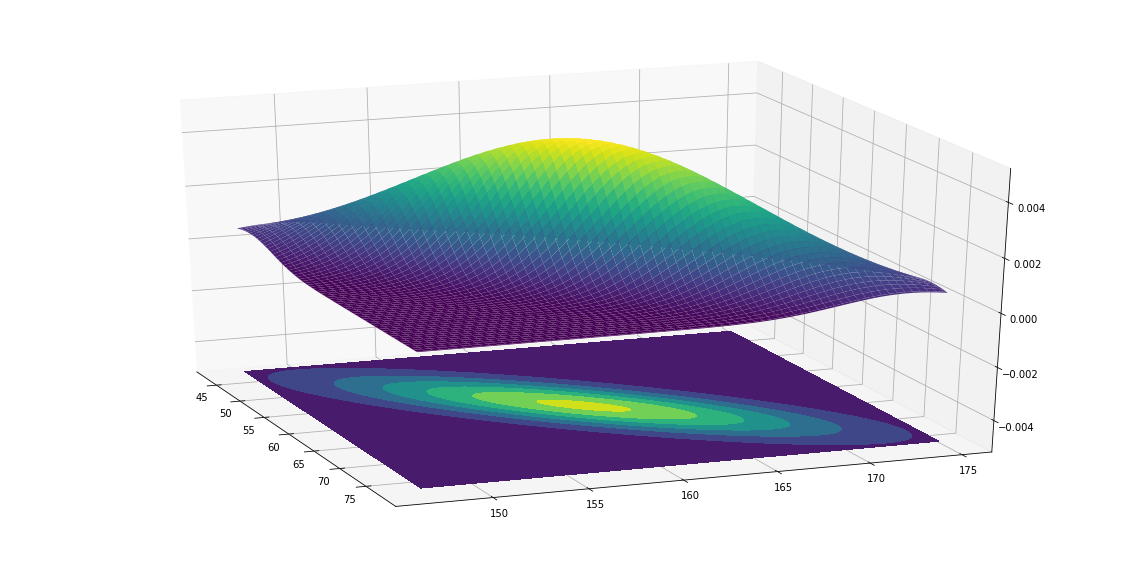

In [40]:
plot_mv_gaussian(np_array_medias_mujeres, np_array_covarianzas_mujeres)

# Como modelo generador de pesos y alturas gaussianas

In [43]:
#Ahora usando los arrays de medias y varianzas, puedo generar valores (sampleo le llaman a esto)
N_gen = 20
print(np.random.multivariate_normal(np_array_medias_hombres, np_array_covarianzas_hombres, N_gen).astype(int))

[[ 74 168]
 [ 90 183]
 [ 86 173]
 [ 87 177]
 [ 68 165]
 [100 187]
 [ 79 178]
 [ 77 174]
 [ 90 177]
 [ 75 166]
 [ 87 176]
 [ 80 170]
 [ 85 174]
 [ 84 179]
 [ 69 161]
 [ 81 178]
 [ 82 172]
 [ 70 168]
 [ 94 183]
 [ 89 180]]
